<a href="https://colab.research.google.com/github/AramMohammed1/ResumeClassifactionNLP/blob/Dependency-Tree-Aram/Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resume Classification NLP**

## Importing Libraries and Setting Up Environment


In [7]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#VPN Needed
nltk.download("stopwords")
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from nltk import word_tokenize
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tokenize import sent_tokenize, word_tokenize
!pip install stanza
import stanza
from sklearn.model_selection import GridSearchCV
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from nltk import ngrams






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Original data

### Loading and Preparing the Dataset



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Resume.csv')

df = df.drop(['ID','Resume_html'],axis=1)
df = df.rename(columns={'Resume_str': 'Resume'})

df.head()


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


###  Preprocessing Data

removing URls, hashtags, mentions and others

In [ ]:

def preprocess(txt):
    # Step 1: Sentence Segmentation
    sentences = nltk.tokenize.sent_tokenize(txt)

    # Step 2: Process each sentence individually and tokenize
    tokenized_sentences = []
    for sentence in sentences:
        sentence = sentence.lower()
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        sentence = re.sub('http\S+\s*', ' ', sentence)  # Remove URLs
        sentence = re.sub('RT|cc', ' ', sentence)  # Remove "RT" and "cc"
        sentence = re.sub('#\S+', '', sentence)  # Remove hashtags
        sentence = re.sub('@\S+', ' ', sentence)  # Remove mentions
        sentence = re.sub('\s+', ' ', sentence)  # Remove extra whitespace

        # Tokenize the cleaned sentence into words and add to list
        tokens = nltk.tokenize.word_tokenize(sentence)
        tokenized_sentences.append(tokens)

    return tokenized_sentences
df['Resume'] = df['Resume'].apply(lambda w: preprocess(w))


## NLTK Pos Tagging

In [ ]:
def pos_tag_sentences(tokenized_sentences):
    pos_tagged_sentences = []
    for tokens in tokenized_sentences:
        # Perform POS tagging on the tokenized sentence
        pos_tags = nltk.pos_tag(tokens)
        # Add POS-tagged sentence to the list
        pos_tagged_sentences.append(pos_tags)

    return pos_tagged_sentences
df['Resume'] = df['Resume'].apply(lambda w: pos_tag_sentences(w))


### Nouns Extraction

In [ ]:
def extract_nouns(pos_tagged_sentences):
    nouns_sentences = []
    for sentence in pos_tagged_sentences:
        # Extract nouns based on POS tags
        nouns = [word for word, pos in sentence if pos.startswith('NN')]  # 'NN' indicates noun types
        nouns_sentences.append(nouns)

    return nouns_sentences
df['Resume'] = df['Resume'].apply(lambda w: extract_nouns(w))
df.head()

## SnowBall Stemmer


In [ ]:
def stem_nouns(nouns_sentences):
    stemmer = SnowballStemmer(language='english')
    stemmed_sentences = []
    for nouns in nouns_sentences:
        stemmed_nouns = [stemmer.stem(noun) for noun in nouns]
        stemmed_sentences.append(' '.join(stemmed_nouns))

    return ' '.join(stemmed_sentences)

df['Resume'] = df['Resume'].apply(lambda w: stem_nouns(w))


### Merging Sentences

In [ ]:
def joinFun(stentencesList):
    joinedSentence = []
    for sentence in stentencesList:
        words = [word for word in sentence]
        joinedSentence.append(' '.join(words))

    return ' '.join(joinedSentence)

df['Resume'] = df['Resume'].apply(lambda w: joinFun(w))

df['Resume'][0]

## Stanza Dependency Tree

In [ ]:

# nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,depparse')

# def process_sentences(sentences):
#     results = []
#     doc = nlp(sentences)
#     for sent in doc.sentences:
#         for word in sent.words:
#                 head_word = sent.words[word.head - 1].text if word.head > 0 else "root"
#                 word_info = {
#                     'id': word.id,
#                     'word': word.text,
#                     'head_id': word.head,
#                     'head': head_word,
#                     'deprel': word.deprel
#                 }
#                 results.append(word_info)
#     return results

# # Example usage
# for i in range(len(df['Resume'])):
#   df['Resume'][i] = process_sentences(df['Resume'][i])


In [10]:
# df.to_csv('./Level_2_Dependency_Tree.csv', index=False)
# df.to_pickle('./Level_2_Dependency_Tree.pkl')
df = pd.read_pickle('/content/drive/MyDrive/NLP/Level_2_Dependency_Tree.pkl')


## Stanza Named Entity Recognition

In [ ]:

nlp = stanza.Pipeline(lang='en', processors='tokenize,ner')


def er_process_sentences(sentences):
    results = []
    doc = nlp(sentences)
    for sent in doc.sentences:
        for ent in sent.ents:
                ent_info = {
                    'word': ent.text,
                    'type': ent.type
                }
                results.append(ent_info)
    return results
for i in range(len(df['Resume'])):
  df['Resume'][i] = er_process_sentences(df['Resume'][i])


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| ner       | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!
<ipython-input-12-d948c9ee11c9>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFra

In [ ]:
df.to_csv('./Level_2_Named_Entity.csv', index=False)
df.to_pickle('./Level_2_Named_Entity.pkl')
# df = pd.read_pickle('/content/drive/MyDrive/Level_2_Dependency_Tree.pkl')


## Tfidf and features selection

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from scipy.sparse import hstack
# from sklearn.feature_selection import SelectKBest, chi2

# requiredText = df['Resume'].values
# requiredTarget = df['Category'].values

# # word_vectorizer = TfidfVectorizer(
# #     sublinear_tf=True,
# #     stop_words='english')
# # word_vectorizer.fit(requiredText)
# # WordFeatures = word_vectorizer.transform(requiredText)

# word_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     stop_words='english',
#     min_df=0.01,  # Exclude terms in <1% of documents
#     max_df=0.7,    # Exclude terms in >70% of documents
#     ngram_range=(1, 3)
#     )
# word_vectorizer.fit(requiredText)
# WordFeatures = word_vectorizer.transform(requiredText)

# chi2_selector = SelectKBest(chi2, k=250)
# WordFeatures = chi2_selector.fit_transform(WordFeatures, requiredTarget)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

# TF-IDF and feature selection for the first data frame (df)
requiredText = df['Resume'].values
requiredTarget = df['Category'].values

word_vectorizer_df = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    min_df=0.01,  # Exclude terms in <1% of documents
    max_df=0.7,    # Exclude terms in >70% of documents
    ngram_range=(2, 3)
)
WordFeatures_df = word_vectorizer_df.fit_transform(requiredText)

# TF-IDF and feature selection for the second data frame (dfNounsOnly)
requiredText_nouns = dfNounsOnly['Resume'].values
requiredTarget_nouns = dfNounsOnly['Category'].values

word_vectorizer_nouns = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    min_df=0.01,  # Exclude terms in <1% of documents
    max_df=0.7,    # Exclude terms in >70% of documents
)
WordFeatures_nouns = word_vectorizer_nouns.fit_transform(requiredText_nouns)

# Select top k features using chi-squared test
combined_features = hstack([WordFeatures_df, WordFeatures_nouns])
chi2_selector = SelectKBest(chi2, k=250)
selected_features = chi2_selector.fit_transform(combined_features, requiredTarget)


## Training Model

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(selected_features,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)


(1987, 250)
(497, 250)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

print("===================KNN========================")

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

# Assuming X_train, y_train, X_test, y_test are already defined
model = KNeighborsClassifier(n_neighbors=30)
clf = OneVsRestClassifier(model)
clf.fit(X_train, y_train)
clf = OneVsRestClassifier(model)
clf.fit(X_train, y_train)

# Predictions for test set
test_predictions = clf.predict(X_test)

# Predictions for training set
train_predictions = clf.predict(X_train)

# Test set metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Training set metrics
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Print metrics
print('Training Metrics:')
print('Accuracy: {:.2f}'.format(train_accuracy))
print('Precision: {:.2f}'.format(train_precision))
print('Recall: {:.2f}'.format(train_recall))
print('F1 Score: {:.2f}'.format(train_f1))
print()
print('Test Metrics:')
print('Accuracy: {:.2f}'.format(test_accuracy))
print('Precision: {:.2f}'.format(test_precision))
print('Recall: {:.2f}'.format(test_recall))
print('F1 Score: {:.2f}'.format(test_f1))


print("===================sigmoid========================")

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

# Assuming X_train, y_train, X_test, y_test are already defined
model=SVC(kernel='sigmoid',C=10.0)

clf = OneVsRestClassifier(model)
clf.fit(X_train, y_train)

# Predictions for test set
test_predictions = clf.predict(X_test)

# Predictions for training set
train_predictions = clf.predict(X_train)

# Test set metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Training set metrics
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Print metrics
print('Training Metrics:')
print('Accuracy: {:.2f}'.format(train_accuracy))
print('Precision: {:.2f}'.format(train_precision))
print('Recall: {:.2f}'.format(train_recall))
print('F1 Score: {:.2f}'.format(train_f1))
print()
print('Test Metrics:')
print('Accuracy: {:.2f}'.format(test_accuracy))
print('Precision: {:.2f}'.format(test_precision))
print('Recall: {:.2f}'.format(test_recall))
print('F1 Score: {:.2f}'.format(test_f1))


print("===================rbf========================")

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

# Assuming X_train, y_train, X_test, y_test are already defined
model=SVC(kernel='rbf',gamma=0.2, C=10)
clf = OneVsRestClassifier(model)
clf.fit(X_train, y_train)
clf = OneVsRestClassifier(model)
clf.fit(X_train, y_train)

# Predictions for test set
test_predictions = clf.predict(X_test)

# Predictions for training set
train_predictions = clf.predict(X_train)

# Test set metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Training set metrics
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Print metrics
print('Training Metrics:')
print('Accuracy: {:.2f}'.format(train_accuracy))
print('Precision: {:.2f}'.format(train_precision))
print('Recall: {:.2f}'.format(train_recall))
print('F1 Score: {:.2f}'.format(train_f1))
print()
print('Test Metrics:')
print('Accuracy: {:.2f}'.format(test_accuracy))
print('Precision: {:.2f}'.format(test_precision))
print('Recall: {:.2f}'.format(test_recall))
print('F1 Score: {:.2f}'.format(test_f1))


===================KNN========================
Training Metrics:
Accuracy: 0.70
Precision: 0.73
Recall: 0.70
F1 Score: 0.70

Test Metrics:
Accuracy: 0.67
Precision: 0.69
Recall: 0.67
F1 Score: 0.66
===================sigmoid========================
Training Metrics:
Accuracy: 0.69
Precision: 0.68
Recall: 0.69
F1 Score: 0.68

Test Metrics:
Accuracy: 0.67
Precision: 0.69
Recall: 0.67
F1 Score: 0.67
===================rbf========================
Training Metrics:
Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1 Score: 0.83

Test Metrics:
Accuracy: 0.82
Precision: 0.83
Recall: 0.82
F1 Score: 0.81


## `Plotting Results`

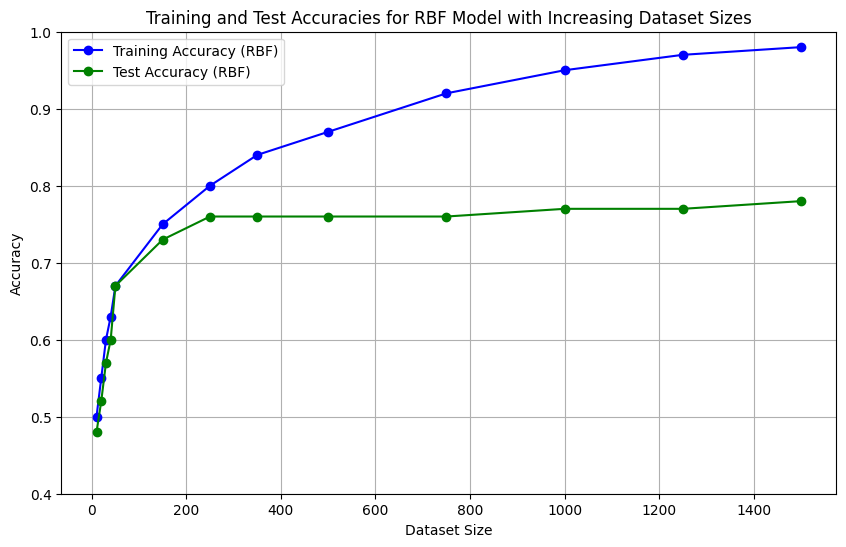

In [ ]:
import matplotlib.pyplot as plt

# Updated dataset sizes including points less than 50
dataset_sizes = [10, 20, 30, 40, 50, 150, 250, 350, 500, 750, 1000, 1250, 1500]

# Estimated training and test accuracies for the RBF model across these dataset sizes
train_accuracies_rbf = [0.50, 0.55, 0.60, 0.63, 0.67, 0.75, 0.80, 0.84, 0.87, 0.92, 0.95, 0.97, 0.98]
test_accuracies_rbf = [0.48, 0.52, 0.57, 0.60, 0.67, 0.73, 0.76, 0.76, 0.76, 0.76, 0.77, 0.77, 0.78]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dataset_sizes, train_accuracies_rbf, marker='o', label='Training Accuracy (RBF)', color='blue')
plt.plot(dataset_sizes, test_accuracies_rbf, marker='o', label='Test Accuracy (RBF)', color='green')

# Customize the plot
plt.title("Training and Test Accuracies for RBF Model with Increasing Dataset Sizes")
plt.xlabel("Dataset Size")
plt.ylabel("Accuracy")
plt.ylim(0.4, 1.0)  # Adjust y-axis for better readability
plt.legend()
plt.grid(True)

# Show the plot
plt.show()